In [82]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [95]:
data = pd.read_csv('./dataset.csv')
x = data.iloc[:,:-2]
y = data.iloc[:,-1]

In [96]:
estimator = RandomForestRegressor(random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
estimator.fit(X_train, y_train)
y_test_pre = estimator.predict(X_test)

rmse = mean_squared_error(y_test, y_test_pre)**0.5
r2 = r2_score(y_test, y_test_pre)

print(f'RMSE:{rmse}')
print(f'r2_score:{r2}')

RMSE:1.9064566905548863
r2_score:0.7825549257642651


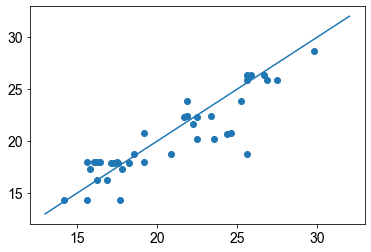

In [100]:
plt.scatter(y_test, y_test_pre)
plt.plot([13,32], [13,32])

<BarContainer object of 4 artists>

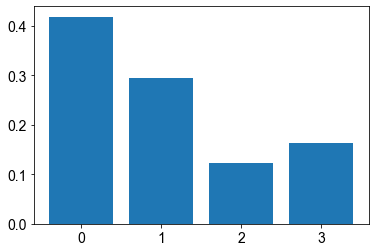

In [101]:
estimator.fit(x,y)
importance = estimator.feature_importances_
feature_name = estimator.feature_names_in_
plt.bar(range(0,4),importance)

In [94]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
import optuna
import xgboost as xgb
import sklearn.svm
import sklearn.ensemble
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import LeaveOneOut
import sklearn.model_selection
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import math
import seaborn as sns
import shap
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.kernel_ridge import KernelRidge

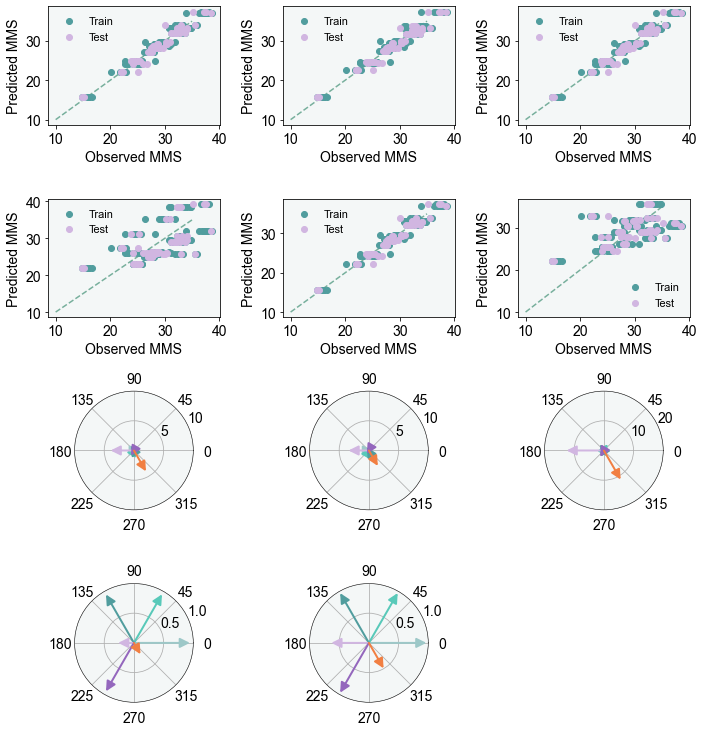

In [104]:
#model train test
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
data = pd.read_csv('./dataset.csv')
x = data.iloc[:,:-2]
y = data.iloc[:,-2]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=203)
color_col = '#f4f7f7'
best_params = {'C': 627, 'gamma': 0.9994189104970056}
SVR = make_pipeline(StandardScaler(),sklearn.svm.SVR(**best_params))
RF = sklearn.ensemble.RandomForestRegressor(random_state=0)
#lgbm = lgb.LGBMRegressor(random_state=0,n_jobs=-1, verbosity = -1)
xgbt = xgb.XGBRegressor(random_state=0,n_jobs=-1)
Ann = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(8, 6), max_iter=1000, random_state=1))
kernel = DotProduct() + WhiteKernel()
DTR = sklearn.tree.DecisionTreeRegressor(random_state=1)
lr = sklearn.linear_model.LinearRegression()
model_name= ['RandomForest', 'SVR','xgbt','ANN','DTR','LinearRegression']
models = [RF, SVR, xgbt, Ann, DTR, lr]
erro_name = ['MSE','RMSE','MAE','MAPE','R2','R']
score = pd.DataFrame(index=model_name, columns=erro_name)
plt.figure(figsize=(10, 10.4))
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Arial' 
for i, model in enumerate(models):
    model.fit(x_train, y_train)
    y_train_pre = model.predict(x_train)
    y_test_pre = model.predict(x_test)
    score['MSE'][model_name[i]] = sklearn.metrics.mean_squared_error(y_test,y_test_pre)
    score['MAE'][model_name[i]] = sklearn.metrics.mean_absolute_error(y_test,y_test_pre)
    score['RMSE'][model_name[i]] = np.sqrt(score['MSE'][model_name[i]])
    score['R2'][model_name[i]] = sklearn.metrics.r2_score(y_test,y_test_pre)
    score['MAPE'][model_name[i]] = mean_absolute_percentage_error(y_test,y_test_pre)
    score['R'][model_name[i]] = np.corrcoef(y_test,y_test_pre)[0,1]
    m = min(y)
    n = max(y)
    ax = plt.subplot(4, 3, i+1)
    ax.scatter(y_train,y_train_pre, c='#519D9E',label='Train')
    ax.scatter(y_test, y_test_pre, c = '#D1B6E1', label = 'Test')
    ax.set_xlabel('Observed MMS')
    ax.set_ylabel('Predicted MMS')
    ax.plot([10,35],[10,35],linestyle='--', c='#77AF9C',zorder=-10)
    #ax.set_xlim(-1,5)
    #ax.set_ylim(-1,5)
    ax.set_facecolor(color_col)
    ax.legend(prop={'size': 11},frameon=False)
# plt.tight_layout()
# plt.savefig('./fig/ml.jpg',dpi=500,bbox_inches='tight')
# SVR.fit(x_train, y_train)
# y_train_pre = SVR.predict(x_train)
# y_test_pre = SVR.predict(x_test)
# mse = sklearn.metrics.mean_squared_error(y_test,y_test_pre)
# mae = sklearn.metrics.mean_absolute_error(y_test,y_test_pre)
# rmse = np.sqrt(mse)
# r2 = sklearn.metrics.r2_score(y_test,y_test_pre)
# mape = mean_absolute_percentage_error(y_test,y_test_pre)
# r = np.corrcoef(y_test,y_test_pre)[0,1]
# m = min(y)
# n = max(y)
def format_angle(value, pos=None):
    degrees = int(np.degrees(value))
    
    return f'{degrees}'
for i in range(1,6,1):

    # 创建数据
    radii = score.iloc[:,i]
    m = min(radii)
    n = max(radii)
    n = math.ceil(n / 10) * 10
    theta = 2 * np.pi * np.linspace(0,5,6)/6

    ax = plt.subplot(4, 3, i+6, projection='polar')

    colors = ['#9DC8C8', '#58C9B9', '#519D9E', '#D1B6E1', '#9467bd', '#F17F42']
    # 创建罗盘图

    # c = ax.scatter(theta, radii, c=colors, alpha=0.8,s=80)
    ax.set_thetagrids(np.arange(0, 360, 45),fontsize=14,va='center_baseline',fontname='Arial')
    if i>3:
        n=1

    # 每60度改变一次颜色
    # 将点变为箭头
    for j in range(len(theta)):
        # ax.arrow(theta[j], 0, 0, radii[j], color=colors[j], alpha=0.8, head_width=0.1, head_length=0.2)
        ax.annotate("", xy=(theta[j], radii[j]), xytext=(0, 0),
                    arrowprops=dict(arrowstyle="-|>", color=colors[j],linewidth=2, mutation_scale=20,shrinkA=0.1, shrinkB=0.4))
    ax.set_yticks(np.linspace(n/2, n,2), endpoint=True,fontname='Arial', fontsize=12)    
    ax.set_rlabel_position(25)
    ax.spines['polar'].set_linewidth(0.5)
    ax.set_facecolor(color_col)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_angle))

plt.tight_layout()
plt.savefig('./polar_Ms.jpg',dpi=500,bbox_inches='tight')
plt.show()
score.to_csv('./score_Ms.csv',index=True)

In [103]:
data = pd.read_csv('./dataset.csv')
x = data.iloc[:,:-2]
y = data.iloc[:,-2]
color_col = '#f4f7f7'
best_params = {'C': 989, 'gamma': 0.2674837948295635}
SVR = make_pipeline(StandardScaler(),sklearn.svm.SVR(**best_params))
RF = sklearn.ensemble.RandomForestRegressor(random_state=0,n_jobs=-1)
xgbt = xgb.XGBRegressor(random_state=0,n_jobs=-1)
model = xgbt.fit(x,y)
# explainer = shap.explainers.Exact(model.predict,x)
# shap_values = explainer(x)
explainer = shap.Explainer(model,x)
shap_values = explainer(x)
col = shap_values.feature_names
feature_importance = pd.DataFrame(abs(shap_values.values).mean(0), index=col, columns=['Importance'])
f = feature_importance.sort_values(by='Importance', ascending=False)
f.to_csv('./f.csv',index=True)
y_ou = shap_values.values
y_ou = pd.DataFrame(y_ou,columns=['1','2','3','4'])
pd.concat((x,y_ou),axis=1).to_csv('./shap.csv',index=False)